# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [10]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=10_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_0 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus_final'
perusresults='results/perus_results9'


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [11]:
if False: # no baseline here
    cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=False)
    cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,
                    save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/perus_results9',
                    callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)
else:
    cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=False)
    cc1.load_sim(load=perusresults)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



# Verrokki

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875

training...








---------------------------------
| explained_variance | 0.999    |
| fps                | 3171     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00875 |
| total_timesteps    | 0        |
| value_loss         | 0.00872  |
---------------------------------


---------------------------------
| explained_variance | 0.763    |
| fps                | 3465     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.595   |
| total_timesteps    | 196353   |
| value_los

---------------------------------
| explained_variance | 0.998    |
| fps                | 3447     |
| nupdates           | 190      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00943 |
| total_timesteps    | 4123413  |
| value_loss         | 0.0198   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3450     |
| nupdates           | 200      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0148  |
| total_timesteps    | 4341583  |
| value_loss         | 0.0187   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3451     |
| nupdates           | 210      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0121  |
| total_timesteps    | 4559753  |
| value_loss         | 0.0181   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3468     |
| nupdates           | 460      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0117  |
| total_timesteps    | 10014003 |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3468     |
| nupdates           | 470      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0156  |
| total_timesteps    | 10232173 |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3468     |
| nupdates           | 480      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0137  |
| total_timesteps    | 10450343 |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3442     |
| nupdates           | 730      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00912 |
| total_timesteps    | 15904593 |
| value_loss         | 0.00998  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3443     |
| nupdates           | 740      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0141  |
| total_timesteps    | 16122763 |
| value_loss         | 0.00971  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3444     |
| nupdates           | 750      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00941 |
| total_timesteps    | 16340933 |
| value_loss         | 0.0095   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

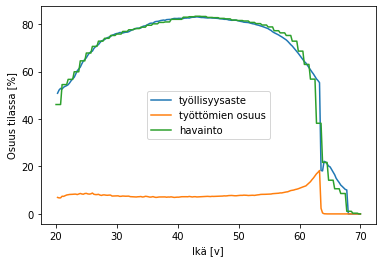

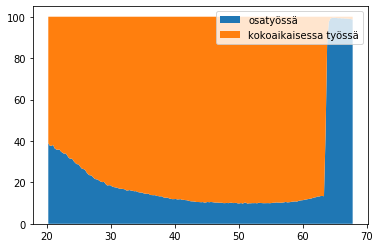

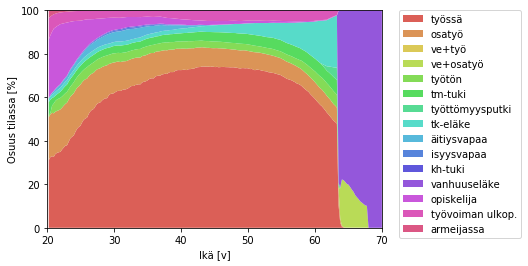

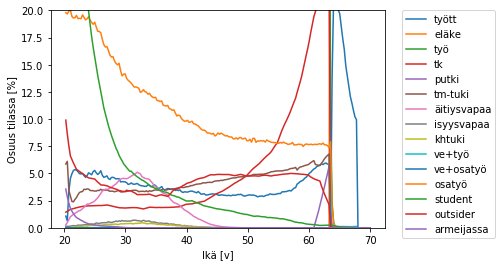

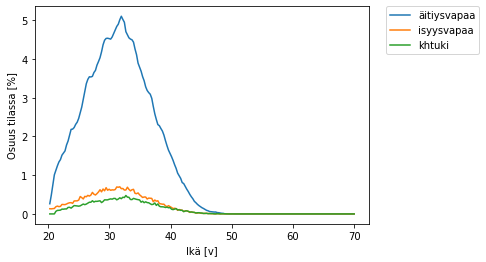

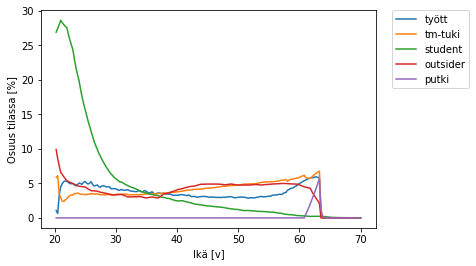

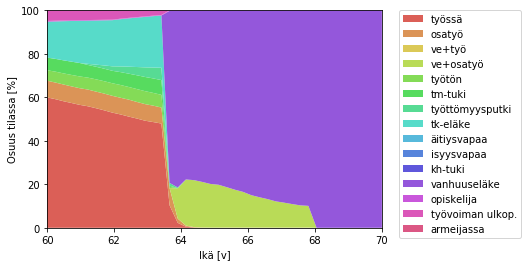

lisäpäivillä on 5788.759052862115 henkilöä


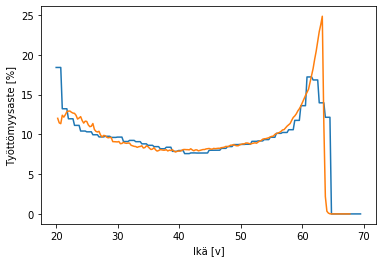

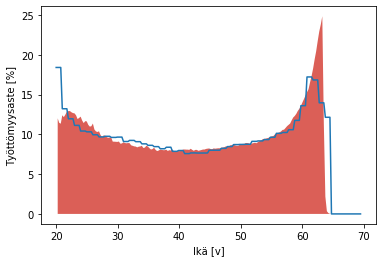

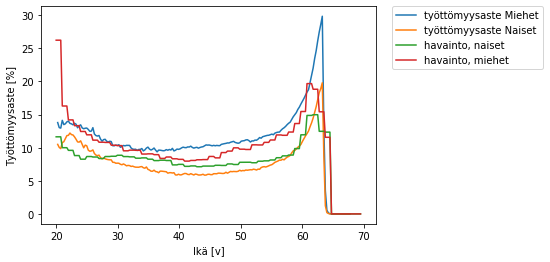

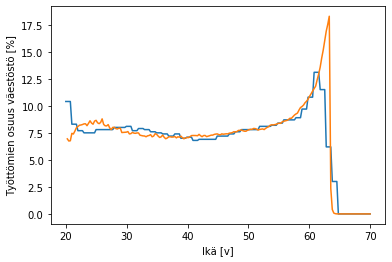

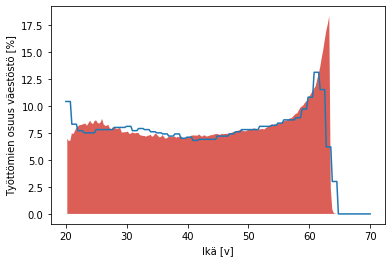

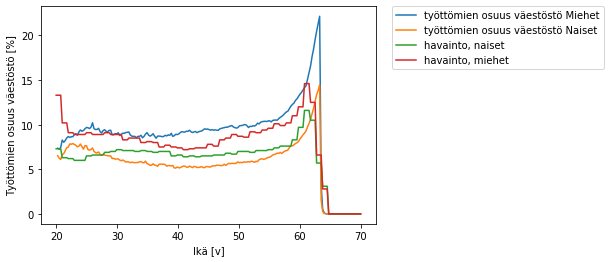

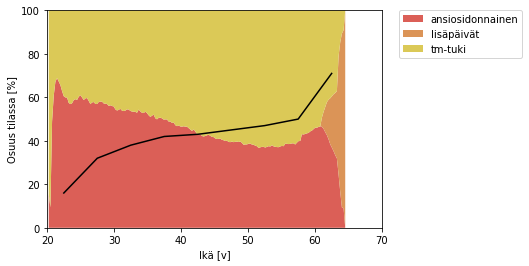

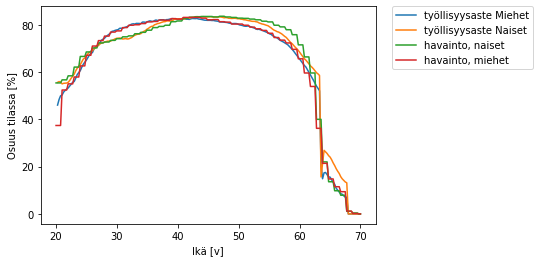

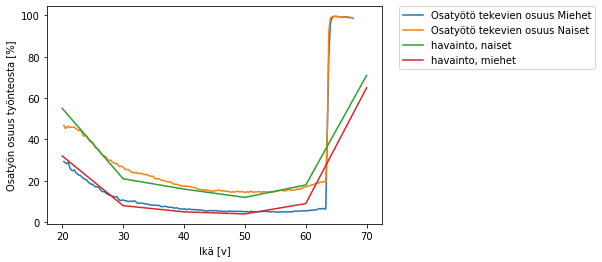

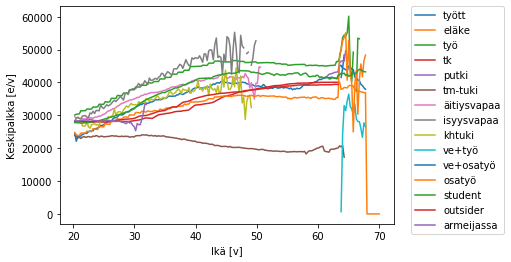

Jakauma ansiosidonnainen+tmtuki+putki, no max age


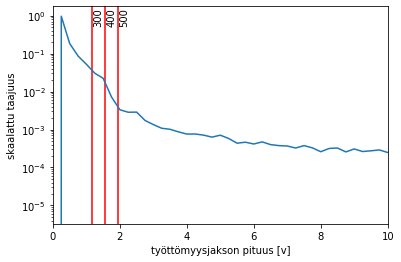

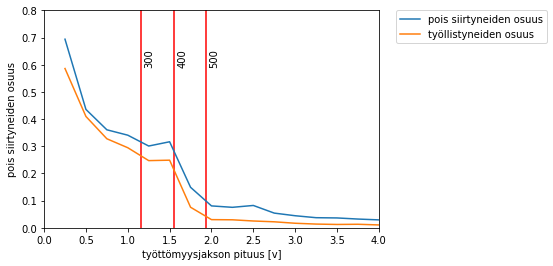

Jakauma ansiosidonnainen+tmtuki+putki, jakso päättynyt ennen 50v ikä


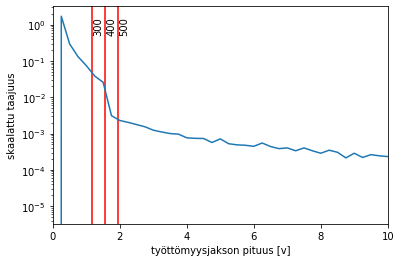

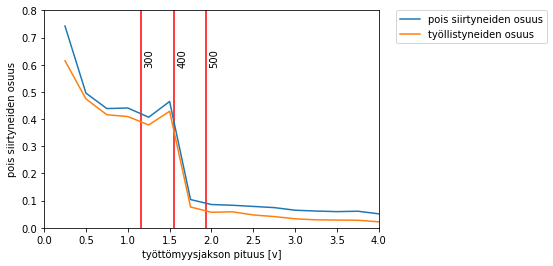

Jakauma ansiosidonnainen+tmtuki ilman putkea


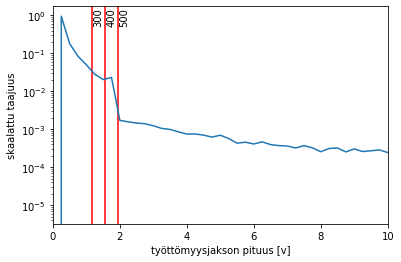

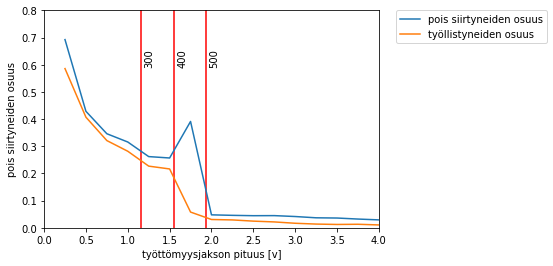

Jakauma ansiosidonnainen+tmtuki ilman putkea, max Ikä 50v


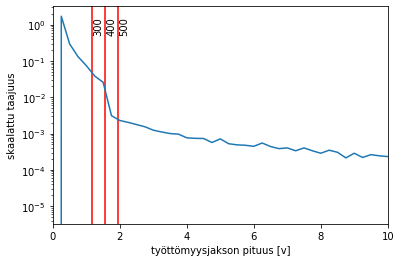

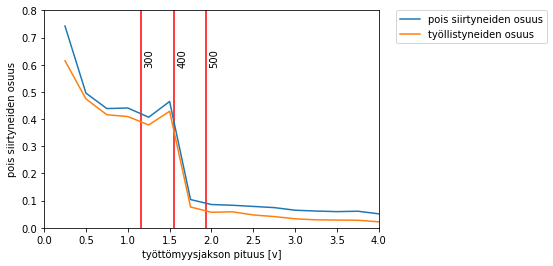

Jakauma tmtuki


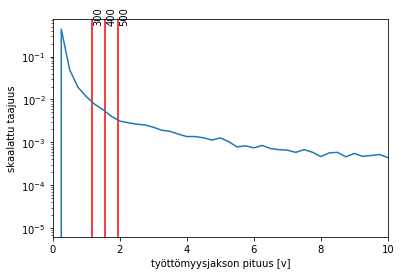

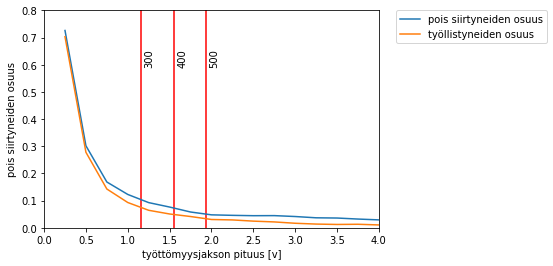

Jakauma laaja (ansiosidonnainen+tmtuki+putki+ulkopuoliset)


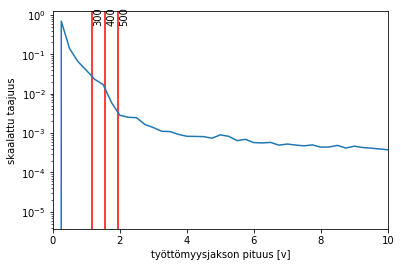

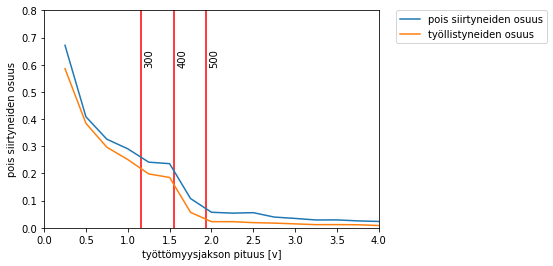

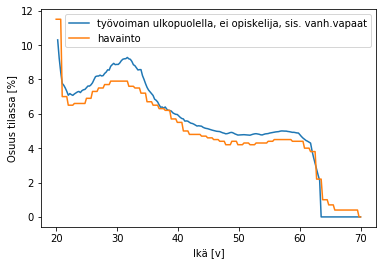

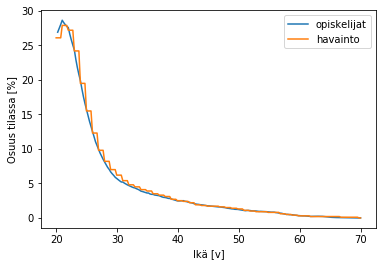

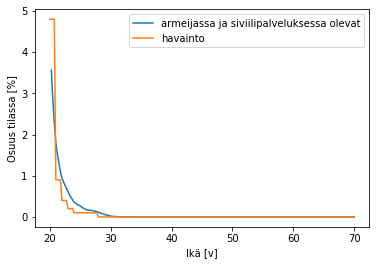

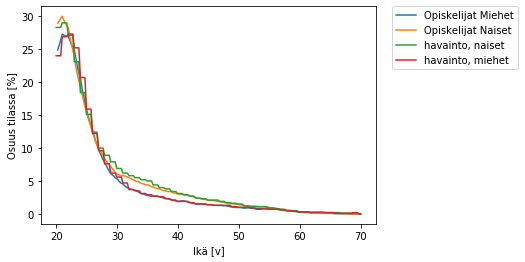

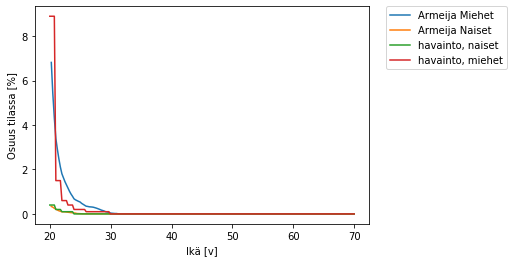

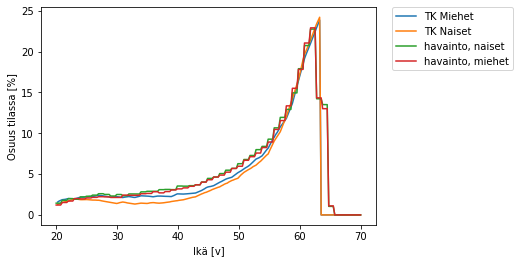

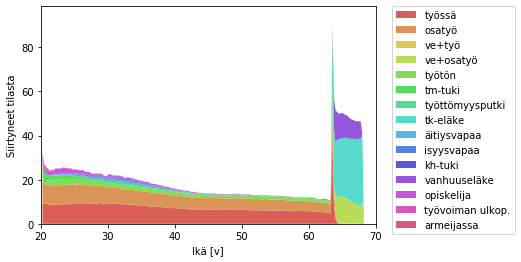

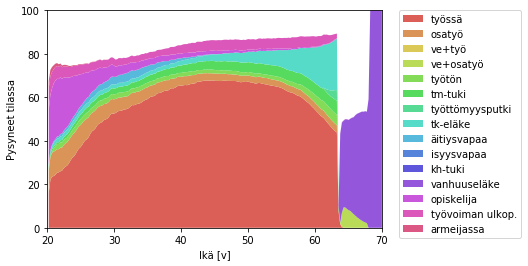

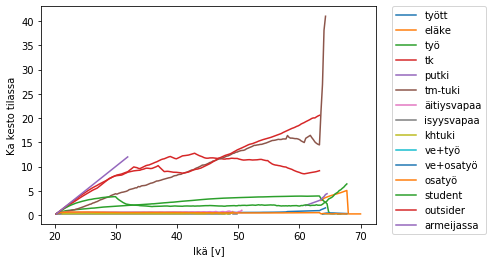

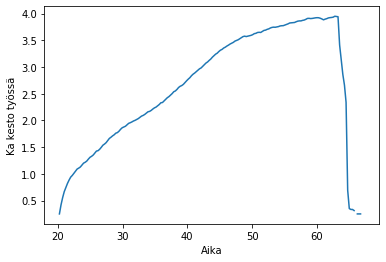

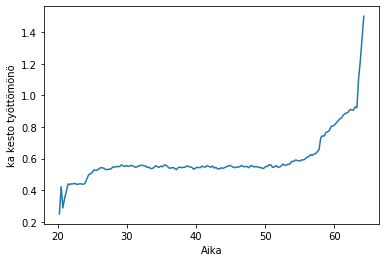

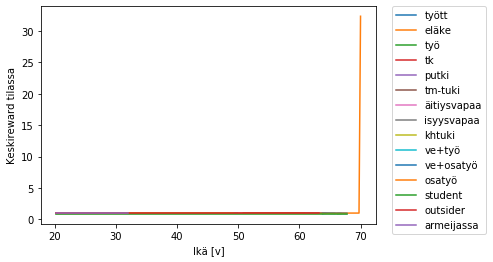

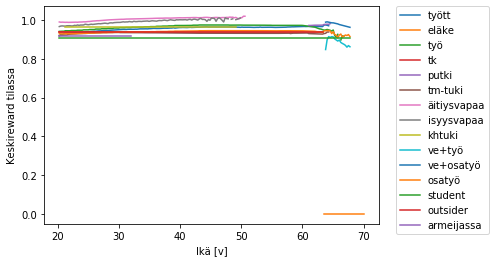

No handles with labels found to put in legend.


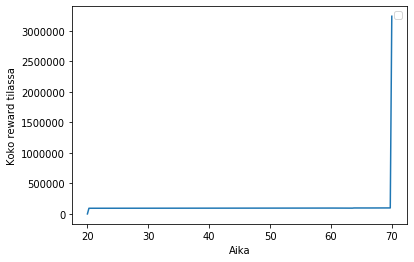

yhteensä reward 224.060198919286


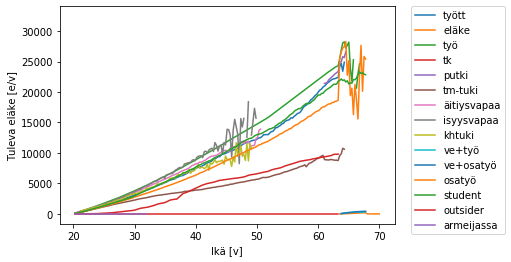

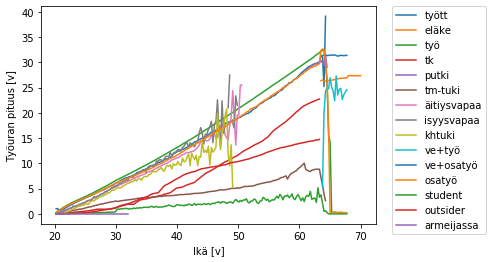

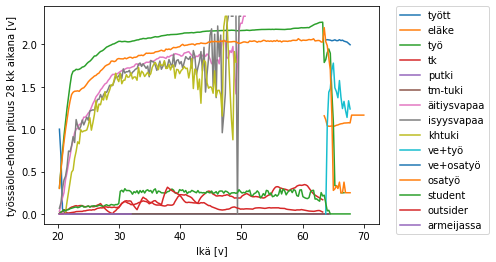

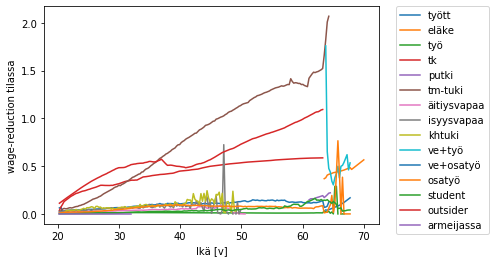

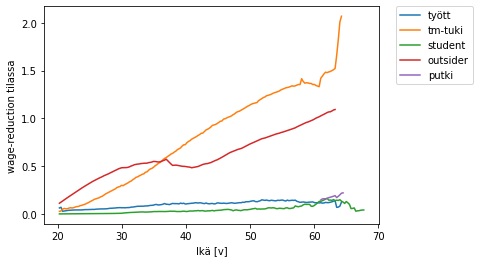

In [9]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
start_from=perusmalli
start_from='best/malli_verrokki'
cc2.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_verrokki',plot=True,
                results='results/malli_perus_final',start_from=start_from,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
#cc2_porras.render(load='results/steps_verrokki')



No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



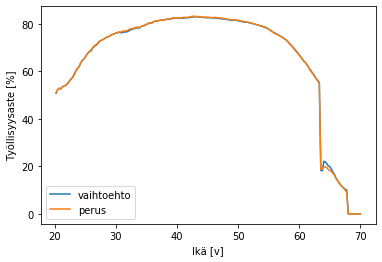

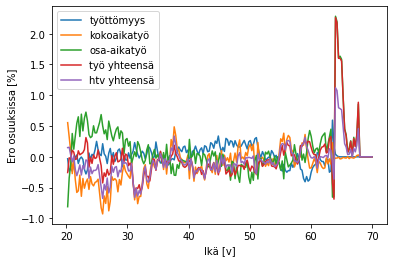

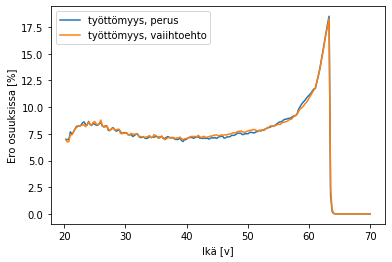

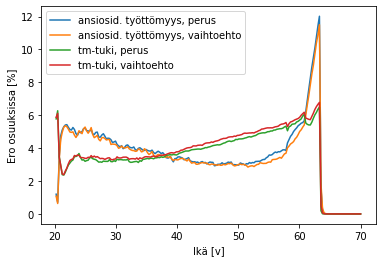

Työllisyysvaikutus 21-63-vuotiaisiin noin -3570 htv ja -2551 työllistö
Työllisyysastevaikutus 21-63-vuotiailla noin -0.09 prosenttia (75.39 vs 75.48)
epävarmuus työllisyysasteissa 0.0062, hajonta 0.0806


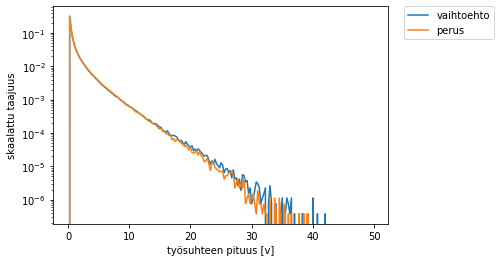

Jakauma ansiosidonnainen+tmtuki+putki, no max age


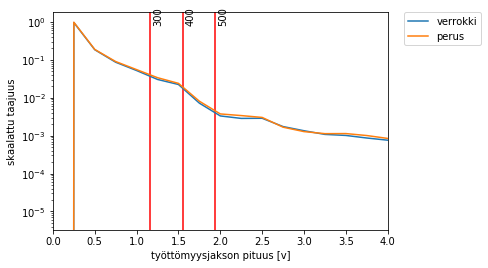

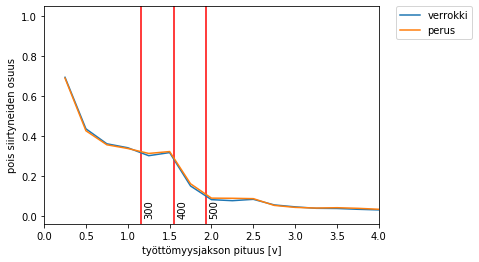

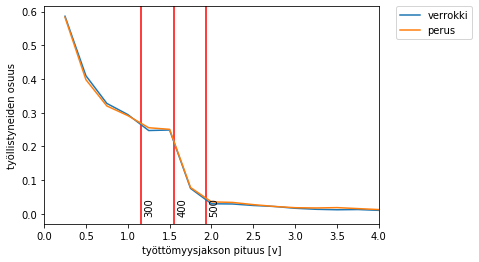

In [11]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.load_sim(load='results/malli_perus_final')
cc2.compare_with(cc1,label='verrokki')

# Politiikkavaihtoehtolaskelmia

Seuraavassa on toteutettu kokoelma politiikkavaihtoehtoja. Näiden laskeminen ei tuota arvioita ennen kuin perusmalli konvergoi stabiilisti,

## Porrastettu työttömyysturva



In [ ]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_steps',plot=False,
                results='results/steps_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc2_porras.render(load='results/steps_results')


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1772     |
| nupdates           | 1        |
| policy_entropy     | 0.964    |
| policy_loss        | -0.0109  |
| total_timesteps    | 0        |
| value_loss         | 0.00945  |
---------------------------------
---------------------------------
| explained_variance | 0.91     |
| fps                | 3211     |
| nupdates           | 10       |
| policy_entropy     | 1.05     |
| policy_loss        | 0.251    |
| total_timesteps    | 21825    |
| value_loss         |

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



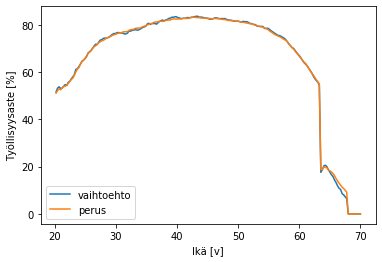

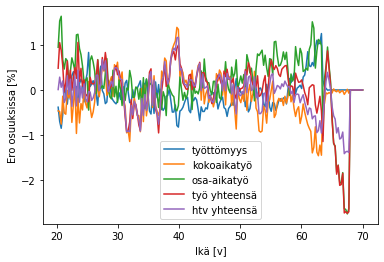

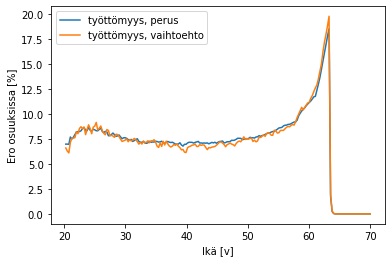

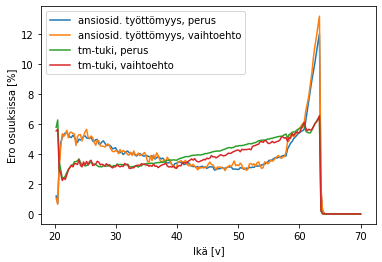

Työllisyysvaikutus 21-63-vuotiaisiin noin -55 htv ja 4032 työllistä
Työllisyysastevaikutus 21-63-vuotiailla noin 0.14 prosenttia (75.61 vs 75.48)
epävarmuus työllisyysasteissa 0.0196, hajonta 0.0814


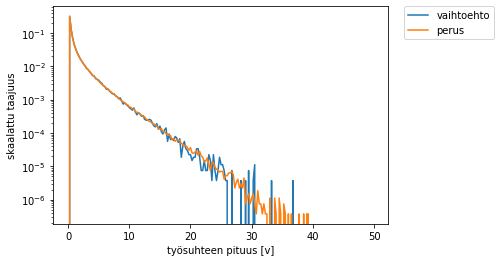

Jakauma ansiosidonnainen+tmtuki+putki, no max age


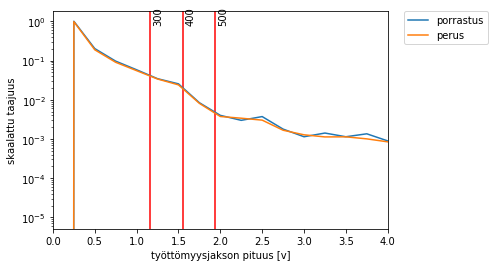

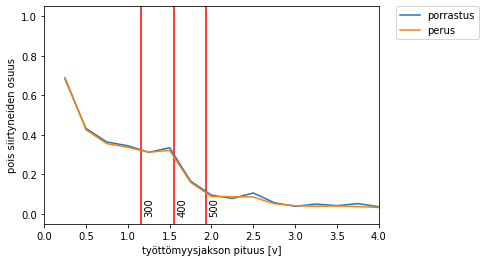

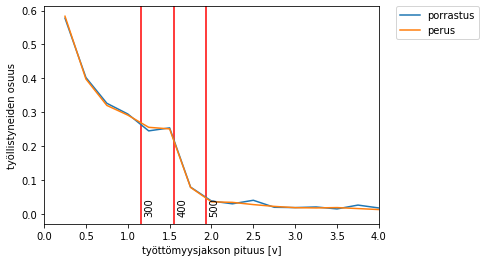

In [5]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.load_sim(load='results/steps_results')
cc2_porras.compare_with(cc1,label='porrastus')

## Työttömyysputken poisto

Työttömyysputkelle meneminen on usein hyvin suosittua elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3339     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0139  |
| total_timesteps    | 0        |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.827    |
| fps                | 3612     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.184   |
| total_timesteps    | 196353   |
| value_loss         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3469     |
| nupdates           | 260      |
| policy_entropy     | 1        |
| policy_loss        | -0.00598 |
| total_timesteps    | 5650603  |
| value_loss         | 0.015    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3468     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0194  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0208   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3468     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0124  |
| total_timesteps    | 6086943  |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3461     |
| nupdates           | 530      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00779 |
| total_timesteps    | 11541193 |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3461     |
| nupdates           | 540      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00861 |
| total_timesteps    | 11759363 |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3460     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0106  |
| total_timesteps    | 11977533 |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3459     |
| nupdates           | 800      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0187  |
| total_timesteps    | 17431783 |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3459     |
| nupdates           | 810      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0142  |
| total_timesteps    | 17649953 |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3459     |
| nupdates           | 820      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0146  |
| total_timesteps    | 17868123 |
| value_loss         | 0.00926  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

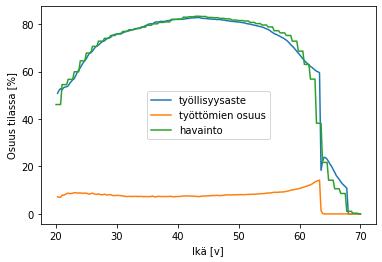

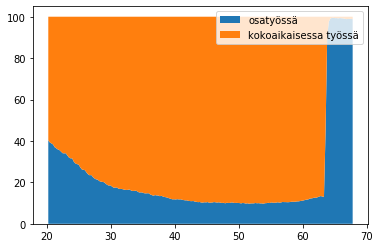

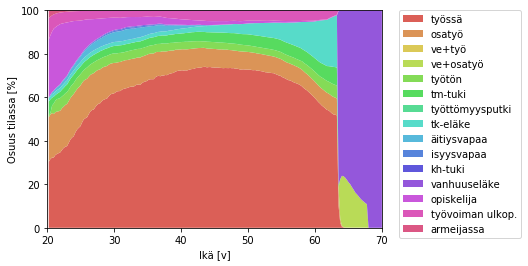

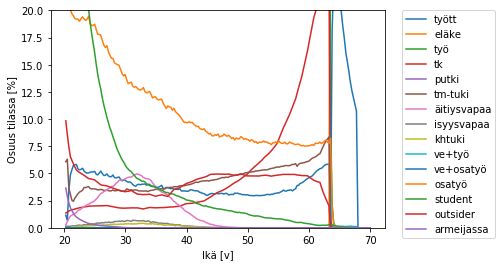

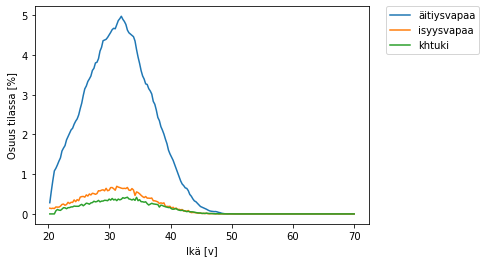

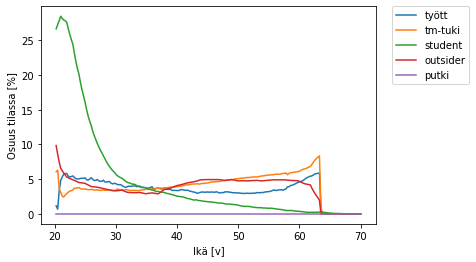

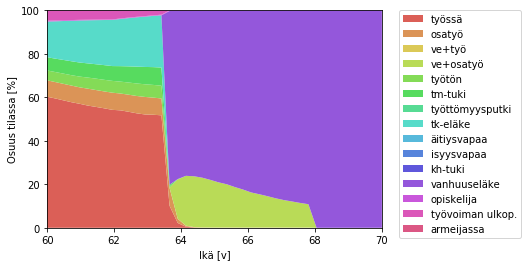

lisäpäivillö on 0.0 henkilöö


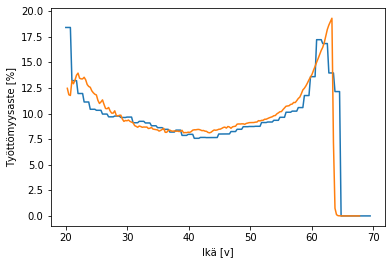

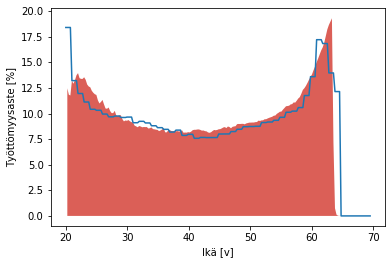

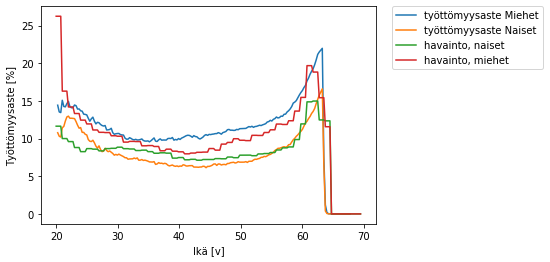

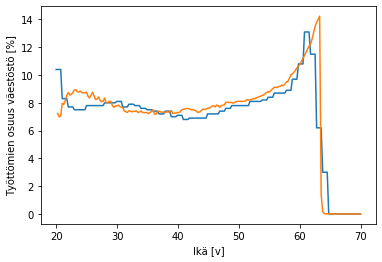

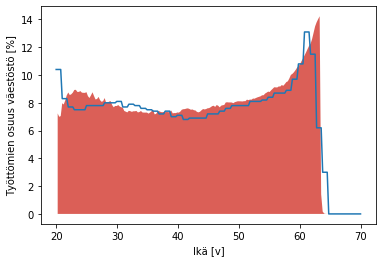

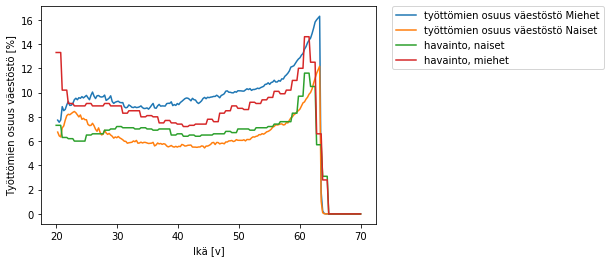

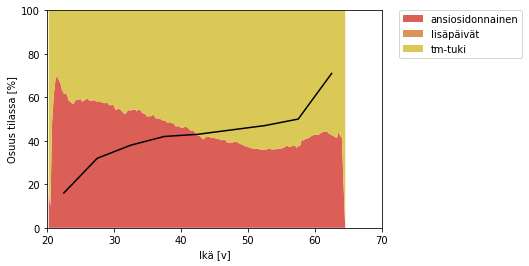

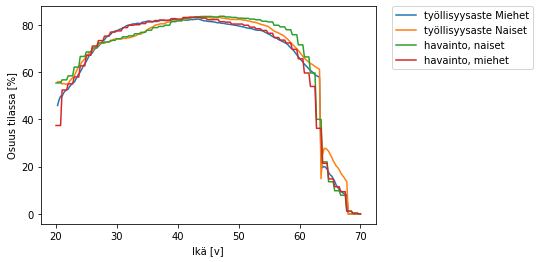

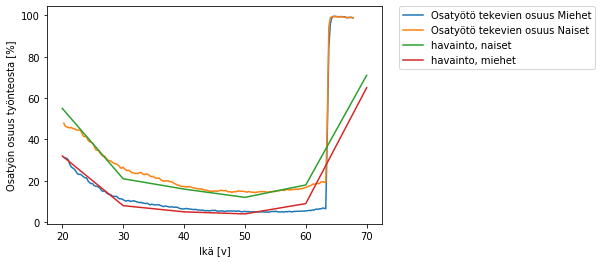

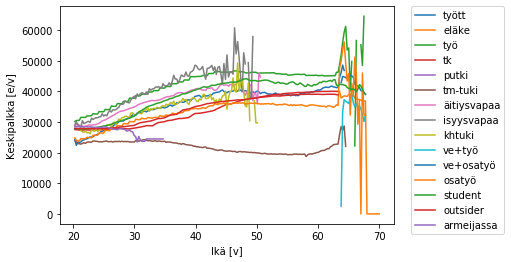

Jakauma ansiosidonnainen+tmtuki+putki, no max age


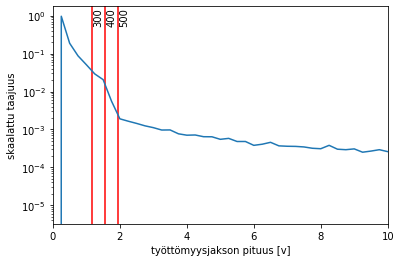

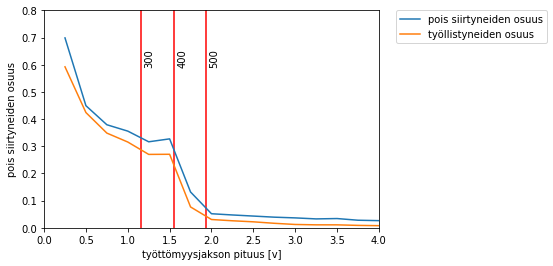

Jakauma ansiosidonnainen+tmtuki+putki, jakso päättynyt ennen 50v ikä


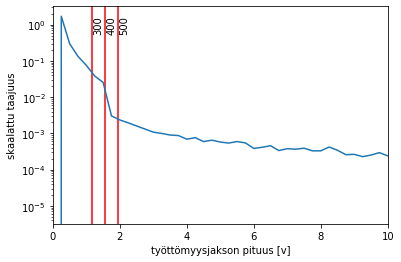

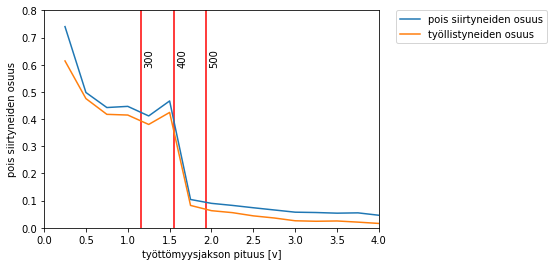

Jakauma ansiosidonnainen+tmtuki ilman putkea


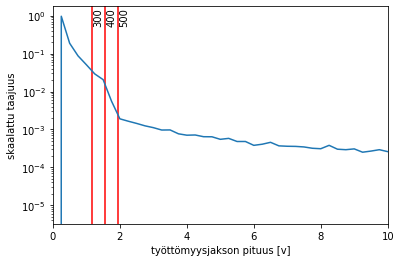

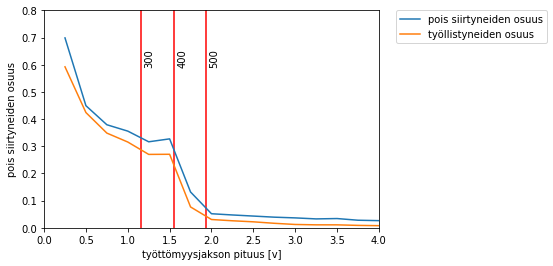

Jakauma ansiosidonnainen+tmtuki ilman putkea, max Ikä 50v


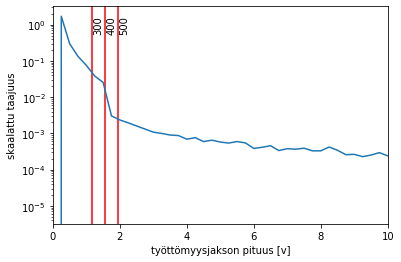

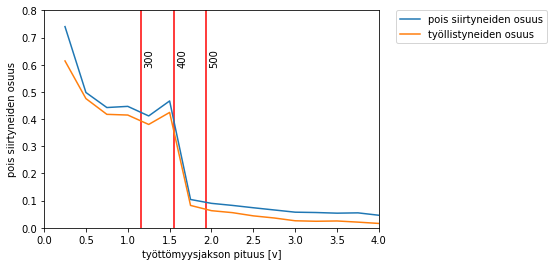

Jakauma tmtuki


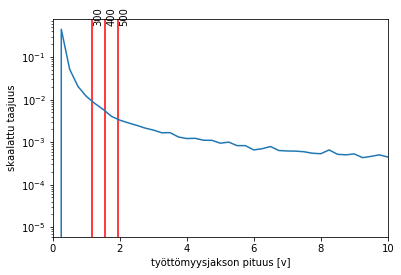

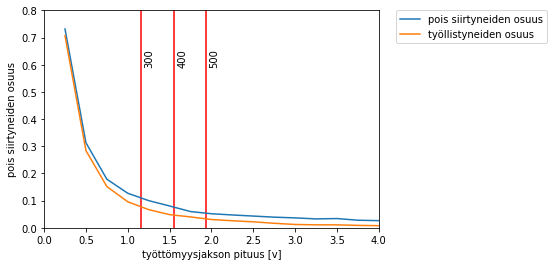

Jakauma laaja (ansiosidonnainen+tmtuki+putki+ulkopuoliset)


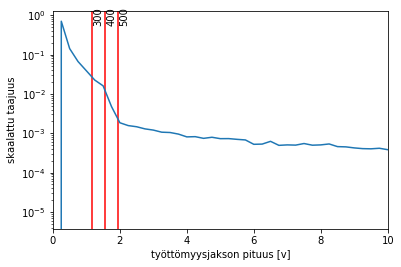

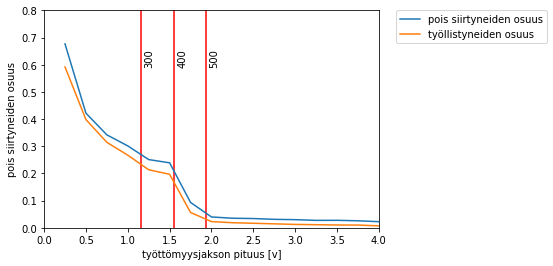

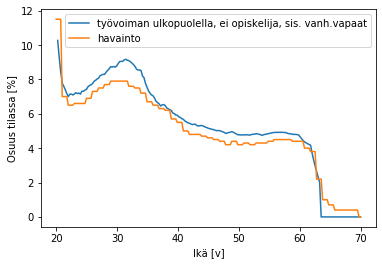

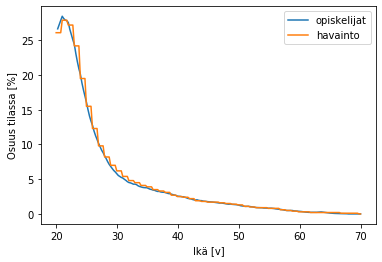

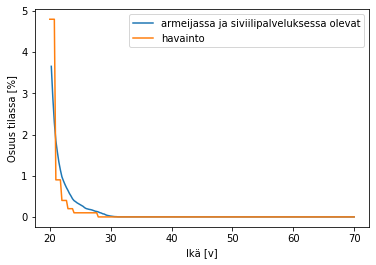

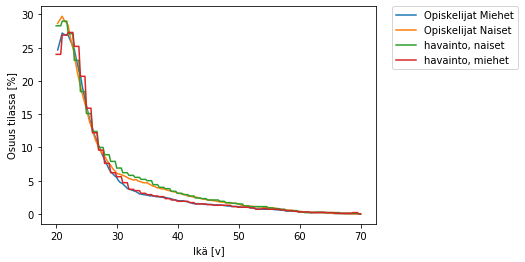

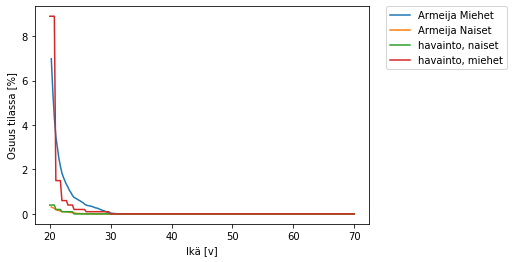

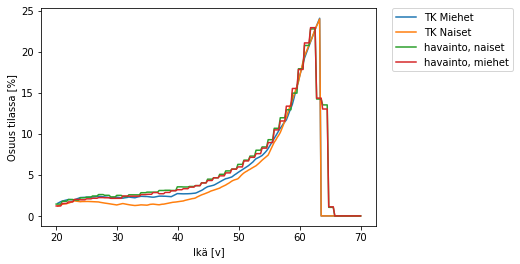

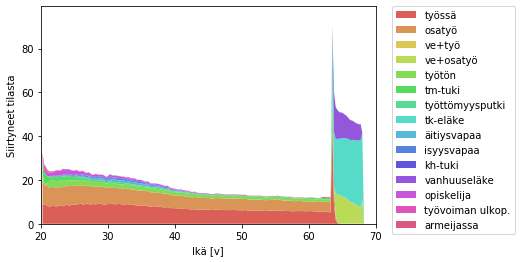

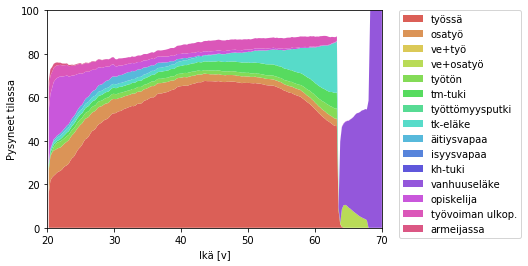

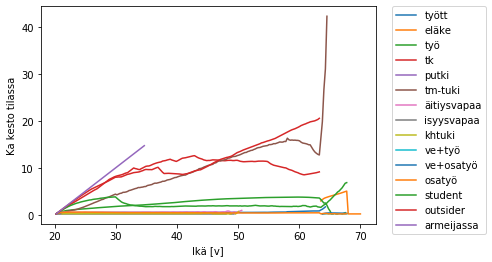

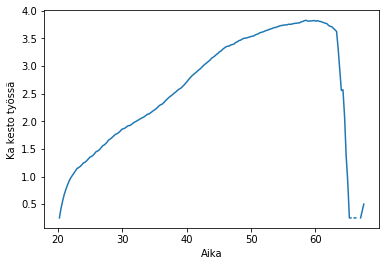

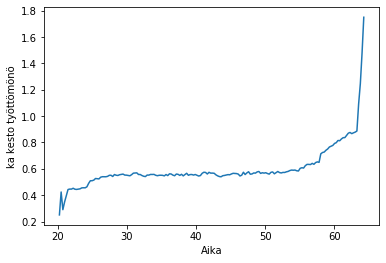

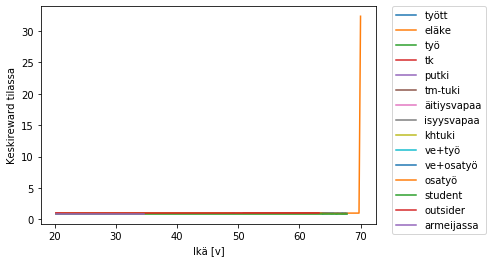

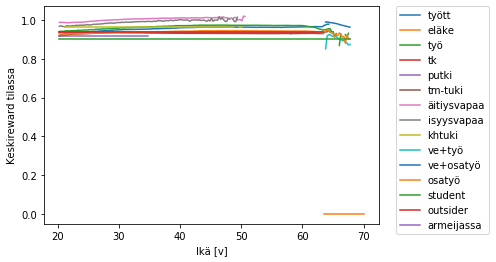

No handles with labels found to put in legend.


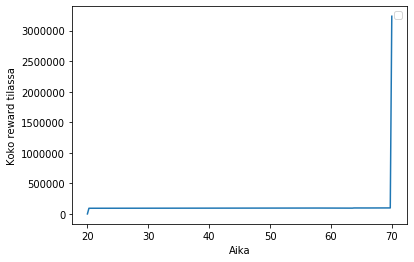

yhteensä reward 224.02588476408812


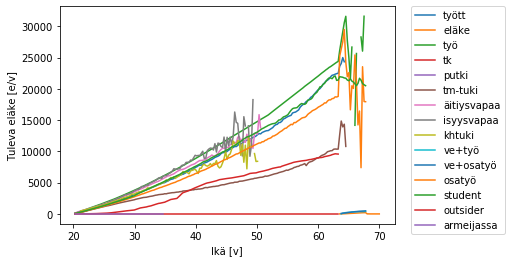

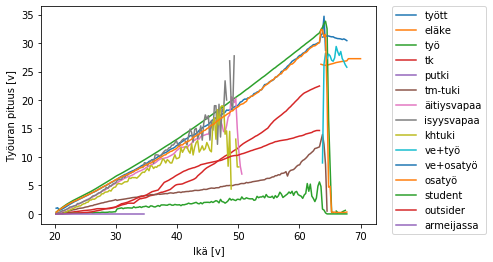

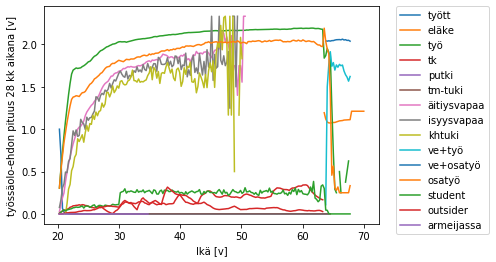

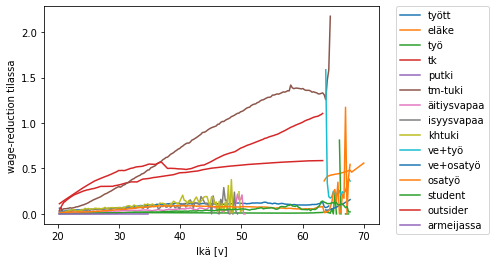

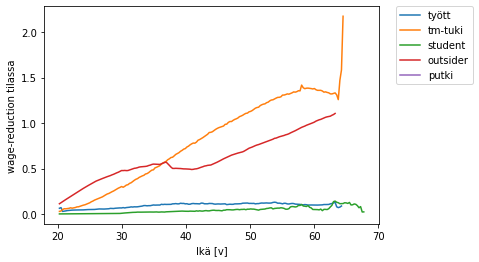

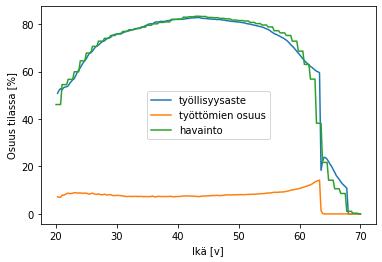

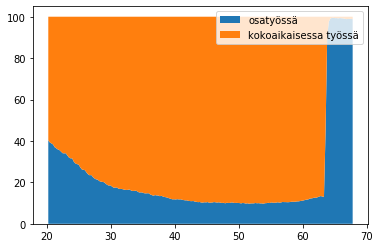

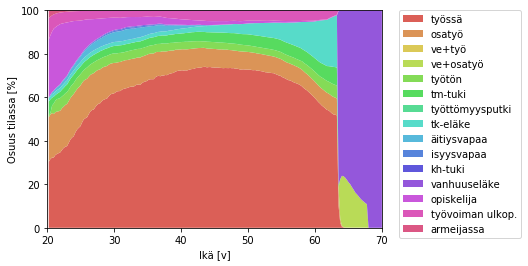

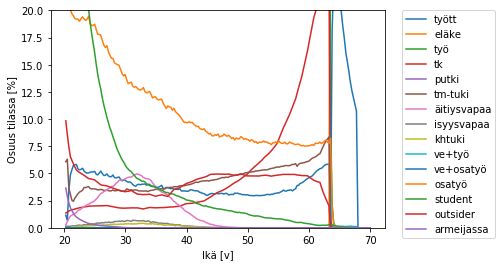

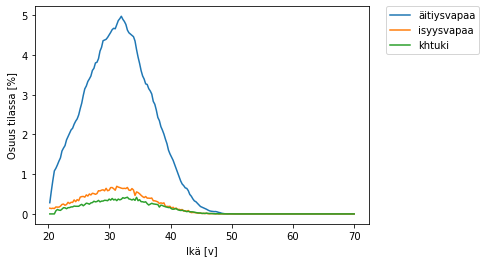

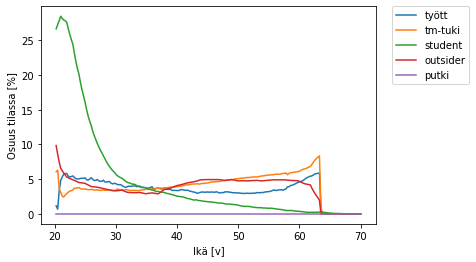

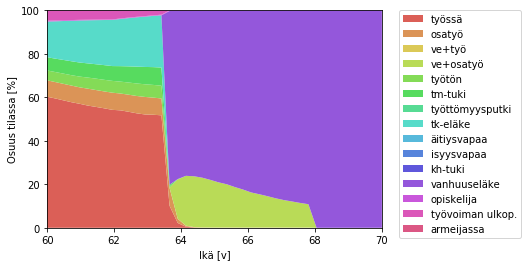

lisäpäivillö on 0.0 henkilöö


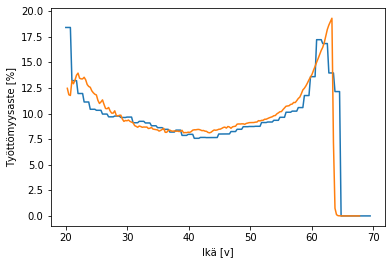

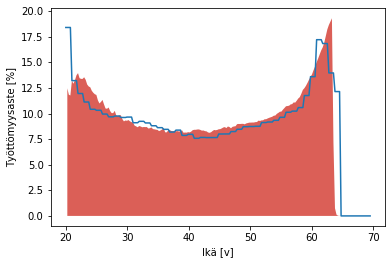

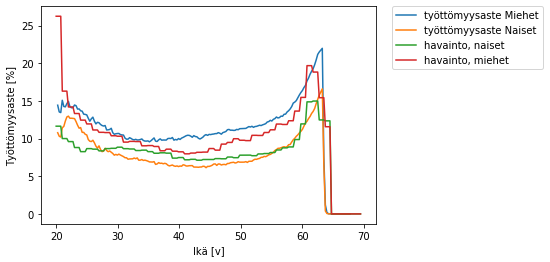

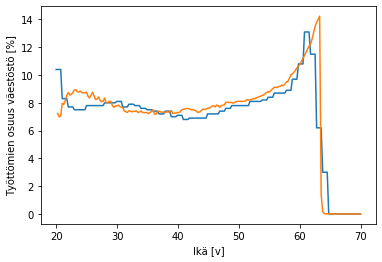

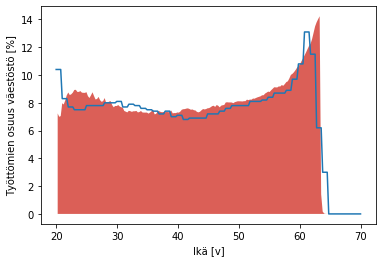

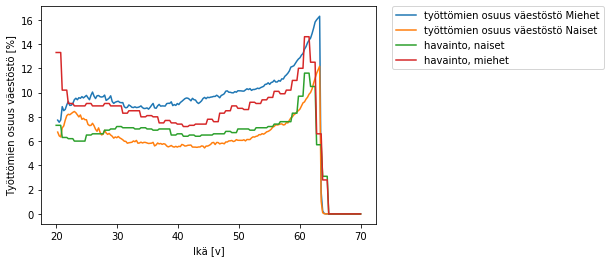

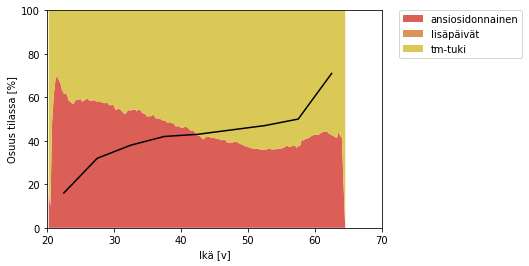

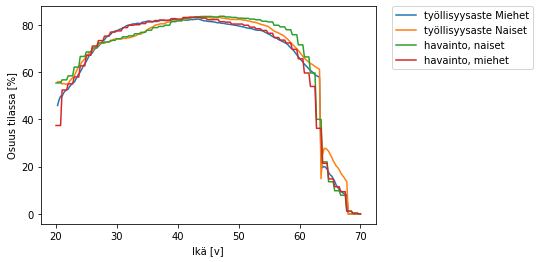

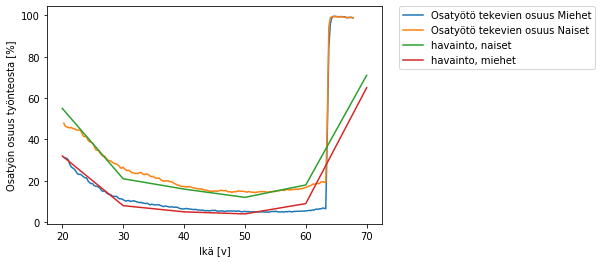

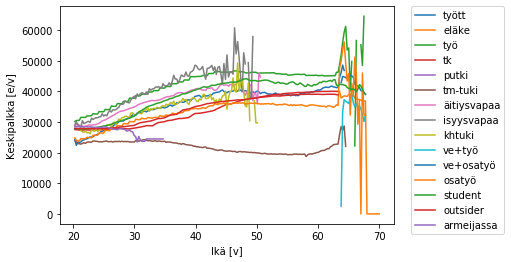

Jakauma ansiosidonnainen+tmtuki+putki, no max age


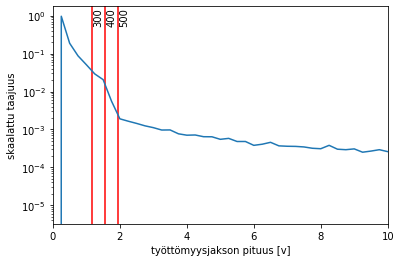

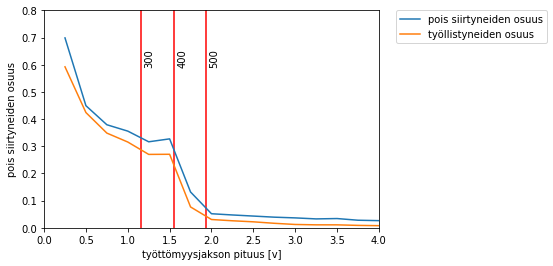

Jakauma ansiosidonnainen+tmtuki+putki, jakso päättynyt ennen 50v ikä


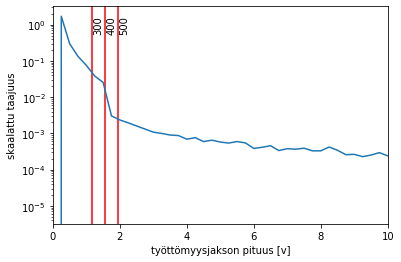

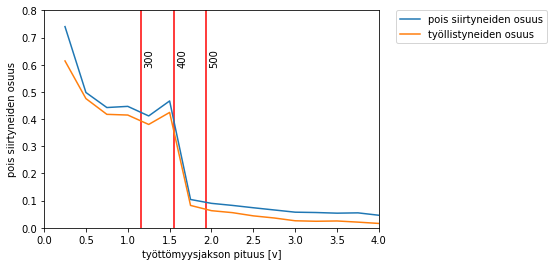

Jakauma ansiosidonnainen+tmtuki ilman putkea


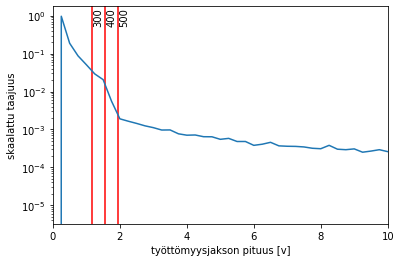

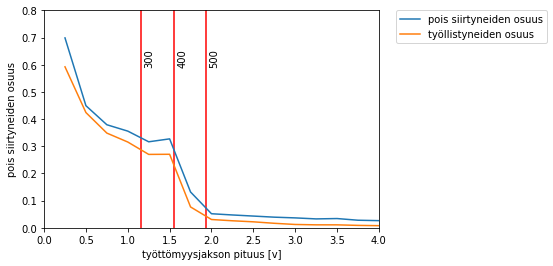

Jakauma ansiosidonnainen+tmtuki ilman putkea, max Ikä 50v


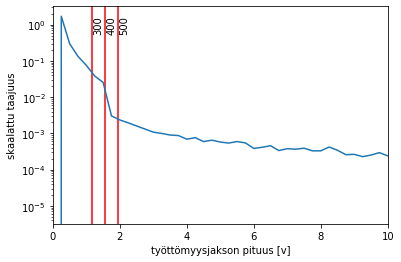

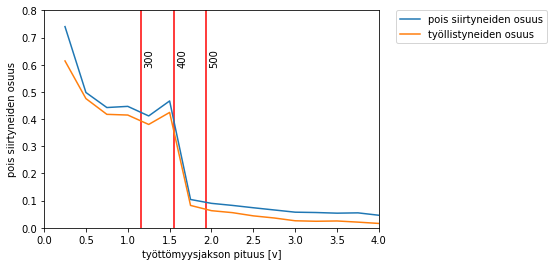

Jakauma tmtuki


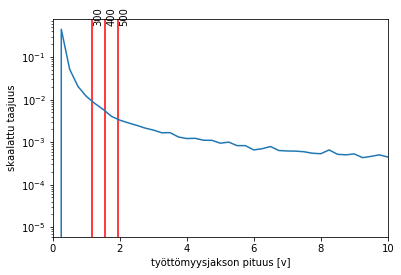

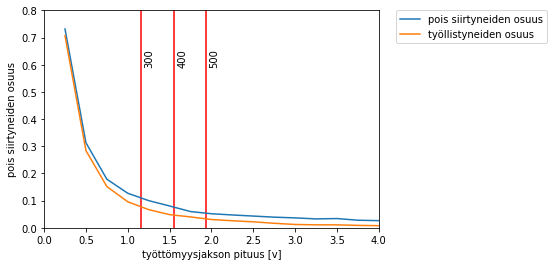

Jakauma laaja (ansiosidonnainen+tmtuki+putki+ulkopuoliset)


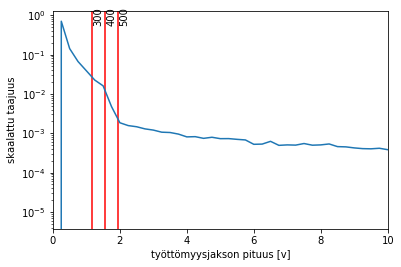

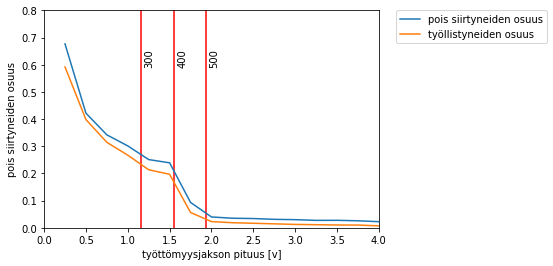

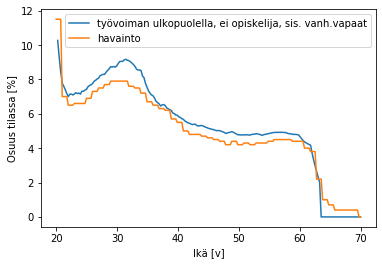

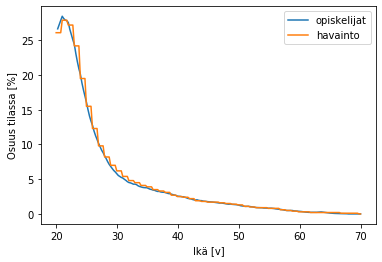

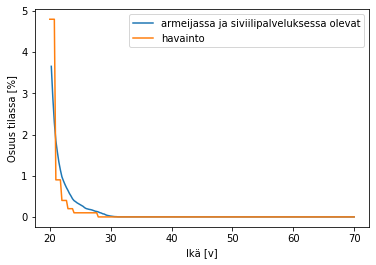

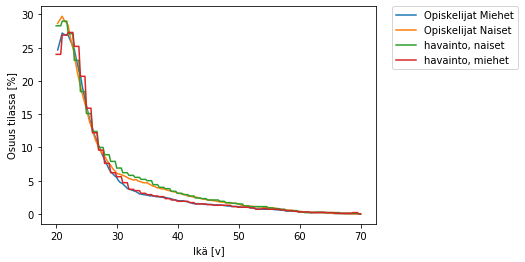

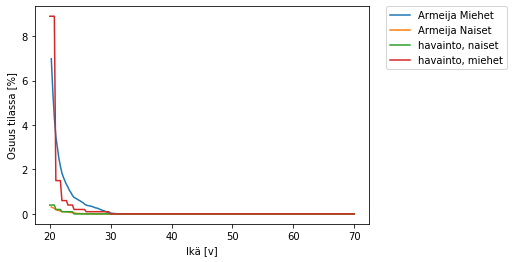

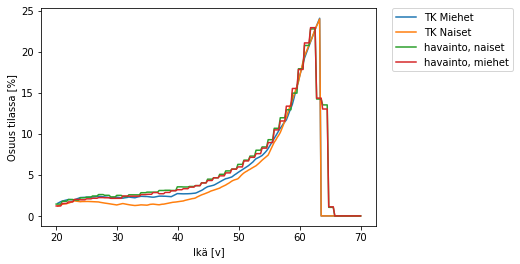

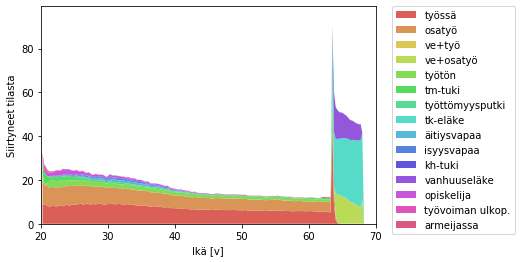

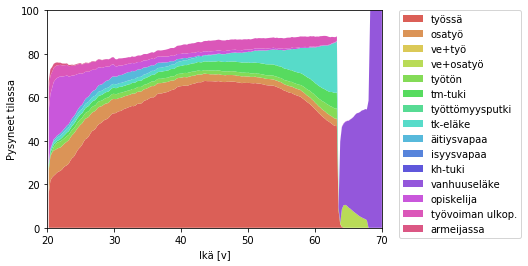

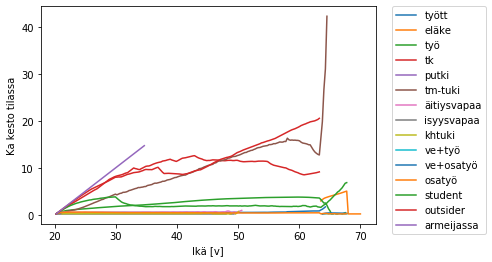

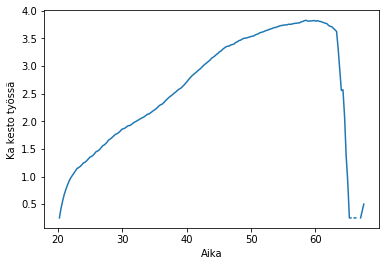

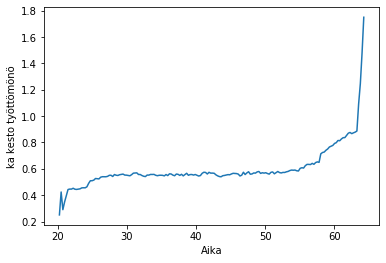

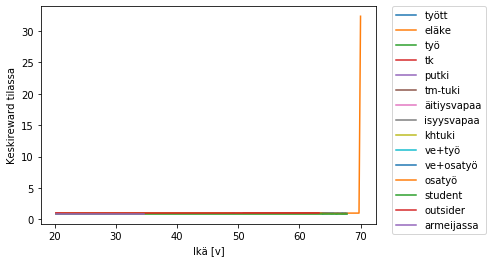

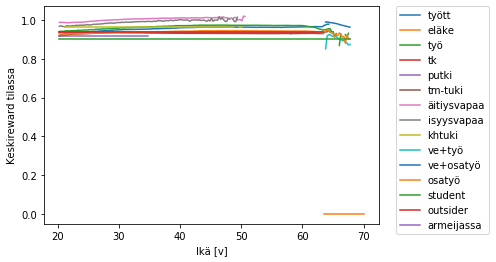

No handles with labels found to put in legend.


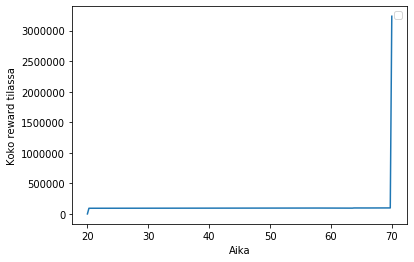

yhteensä reward 224.02588476408812


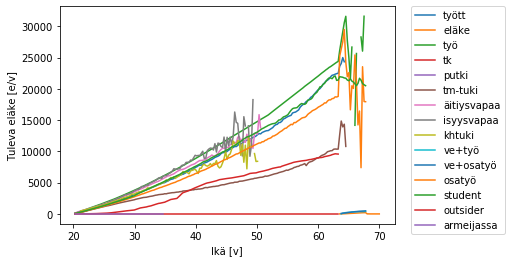

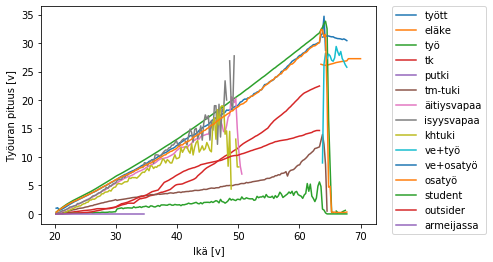

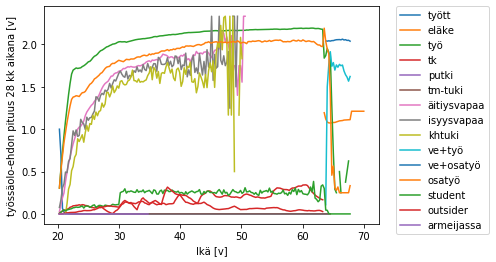

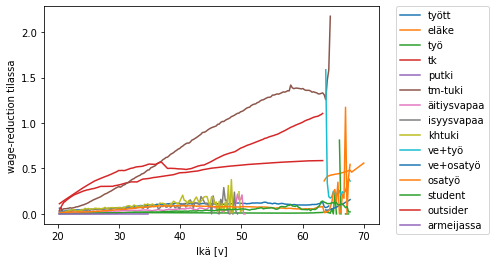

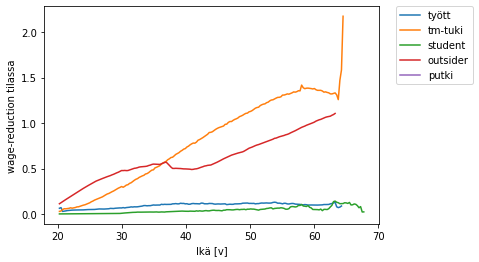

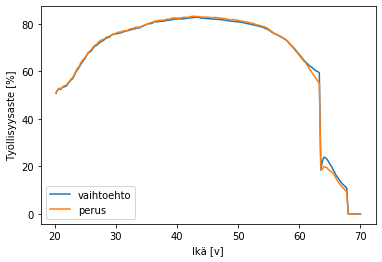

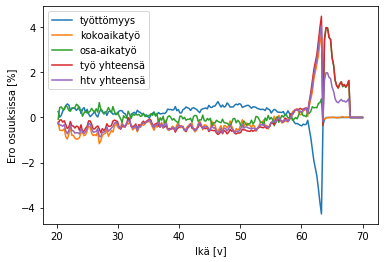

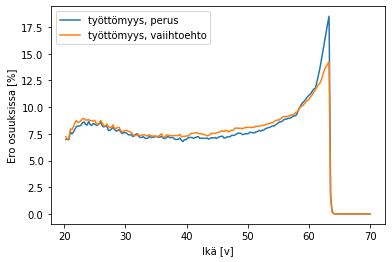

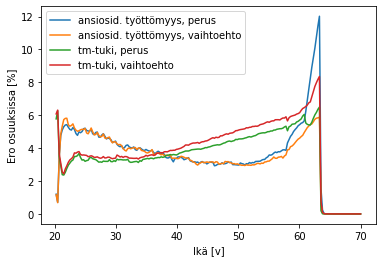

Työllisyysvaikutus 21-63-vuotiaisiin noin -8732 htv ja -8097 työllistö
Työllisyysastevaikutus 21-63-vuotiailla noin -0.28 prosenttia (75.20 vs 75.48)
epävarmuus työllisyysasteissa 0.0062, hajonta 0.0791


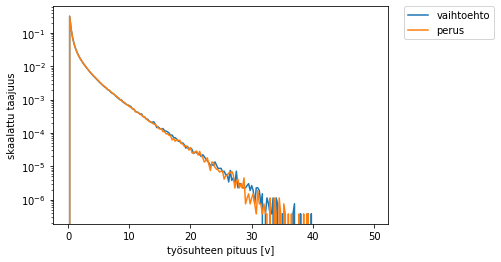

Jakauma ansiosidonnainen+tmtuki+putki, no max age


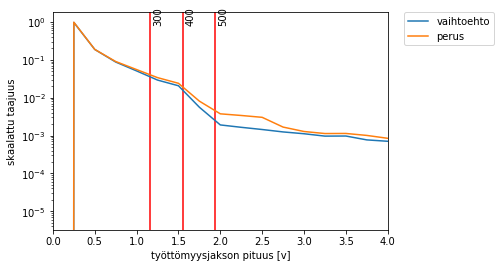

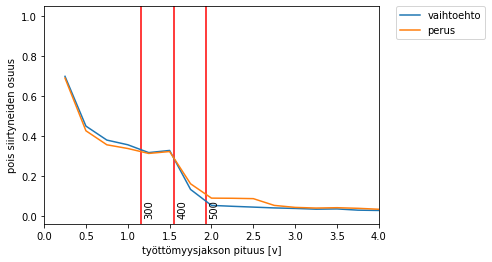

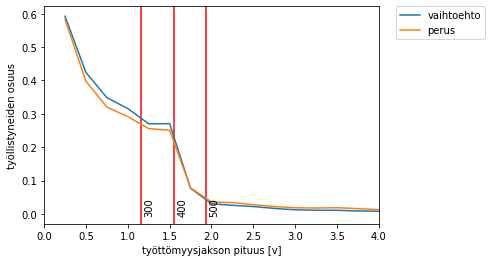

In [7]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                      train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_putki',
                      plot=True,results='results/putki_results',start_from=perusmalli,cont=True,
                      callback_minsteps=callback_minsteps,twostage=twostage)


In [5]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)

cc1_putki_b.load_sim(load='results/putki_results')
cc1_putki_b.compare_with(cc2) 
cc1_putki_b.render()

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True



NameError: name 'cc2' is not defined

## EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3328     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0149  |
| total_timesteps    | 0        |
| value_loss         | 0.00993  |
---------------------------------
---------------------------------
| explained_variance | 0.618    |
| fps                | 3548     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 1.28     |
| total_timesteps    | 196353   |
| value_loss         |

---------------------------------
| explained_variance | 0.999    |
| fps                | 3458     |
| nupdates           | 260      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0201  |
| total_timesteps    | 5650603  |
| value_loss         | 0.0169   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3459     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0222  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0186   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3457     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0115  |
| total_timesteps    | 6086943  |
| value_loss         | 0.0228   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3450     |
| nupdates           | 530      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0144  |
| total_timesteps    | 11541193 |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3449     |
| nupdates           | 540      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0101  |
| total_timesteps    | 11759363 |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3450     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0095  |
| total_timesteps    | 11977533 |
| value_loss         | 0.0144   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3448     |
| nupdates           | 800      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0152  |
| total_timesteps    | 17431783 |
| value_loss         | 0.00981  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3448     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00983 |
| total_timesteps    | 17649953 |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3449     |
| nupdates           | 820      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0147  |
| total_timesteps    | 17868123 |
| value_loss         | 0.00992  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

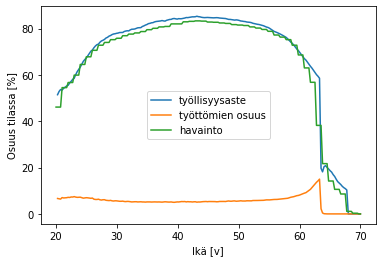

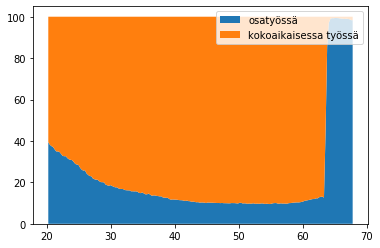

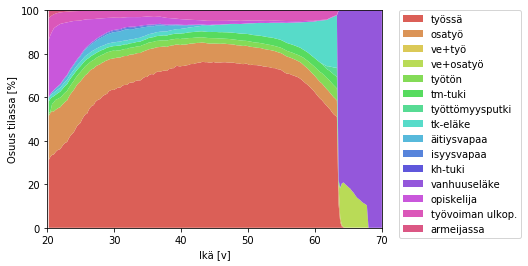

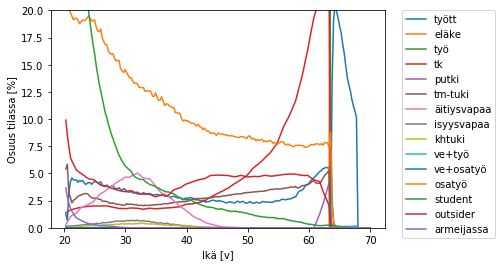

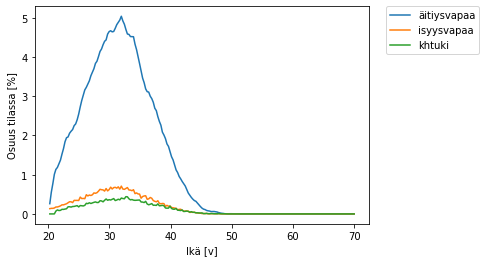

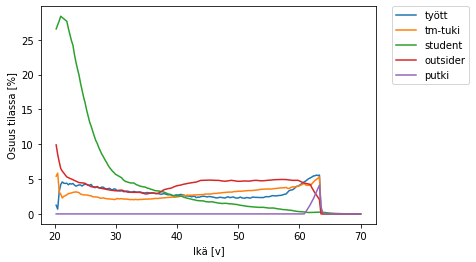

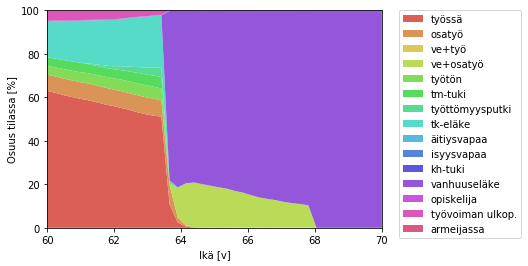

lisäpäivillö on 4087.6784871394852 henkilöö


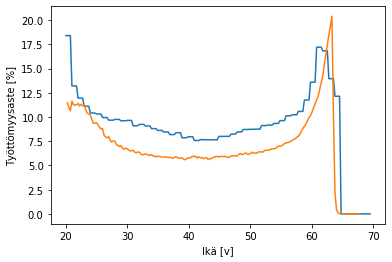

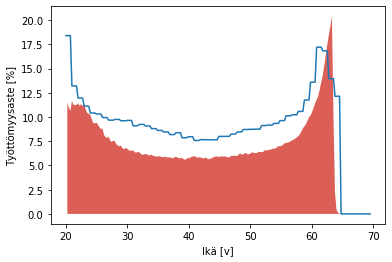

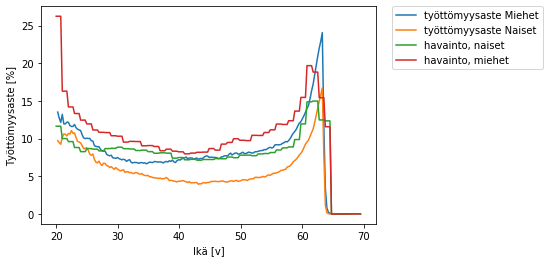

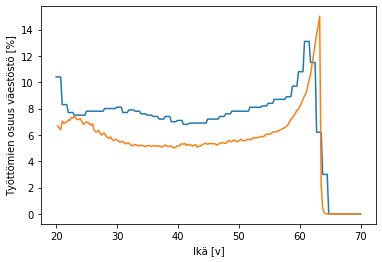

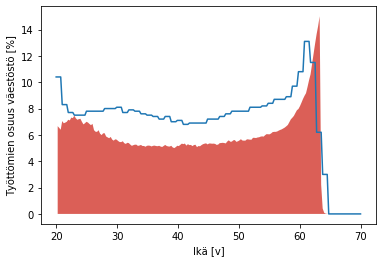

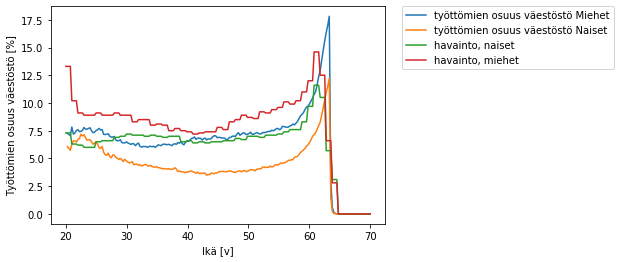

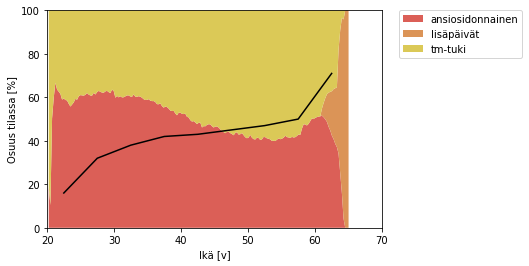

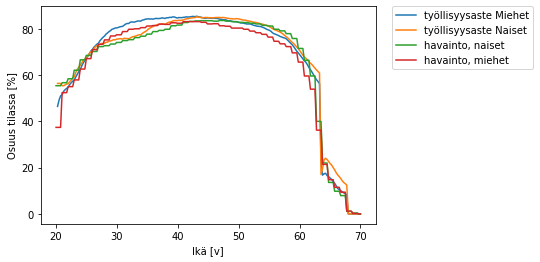

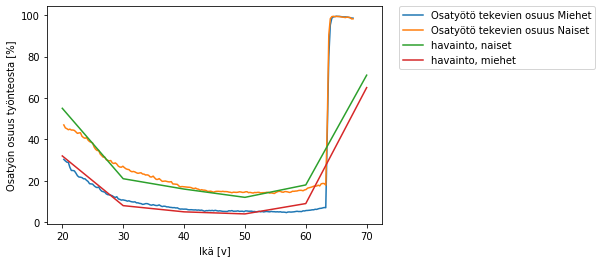

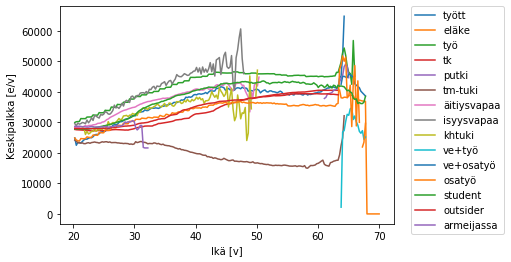

Jakauma ansiosidonnainen+tmtuki+putki, no max age


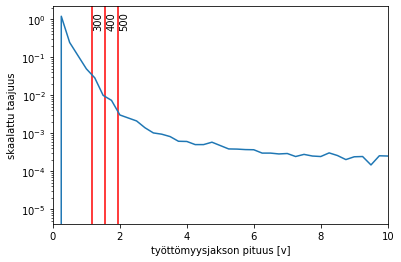

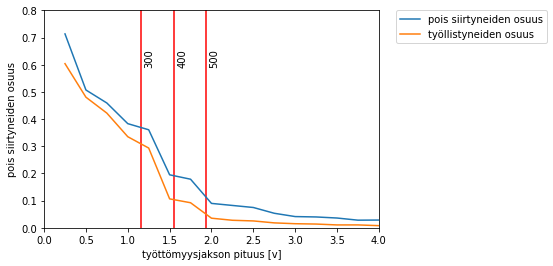

Jakauma ansiosidonnainen+tmtuki+putki, jakso päättynyt ennen 50v ikä


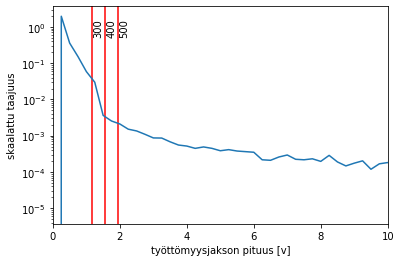

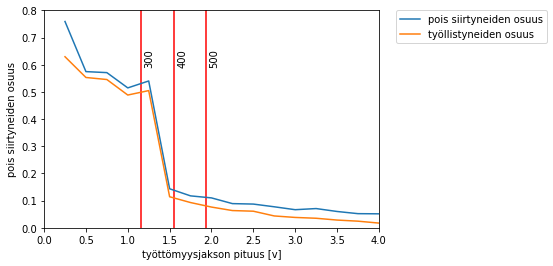

Jakauma ansiosidonnainen+tmtuki ilman putkea


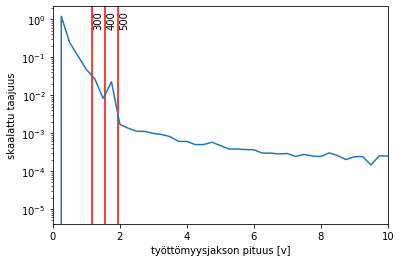

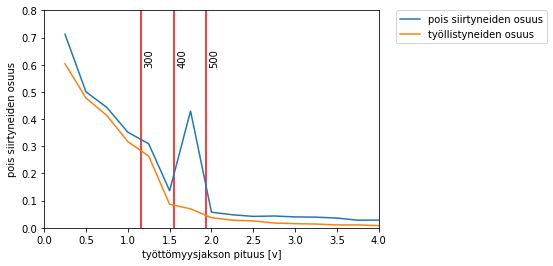

Jakauma ansiosidonnainen+tmtuki ilman putkea, max Ikä 50v


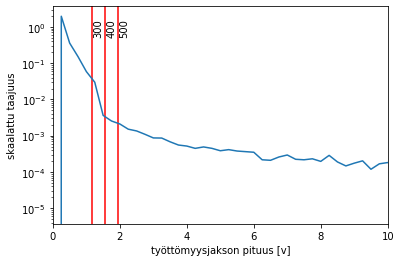

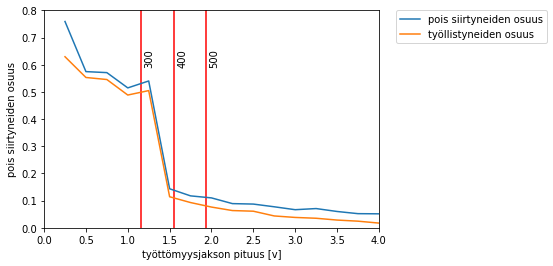

Jakauma tmtuki


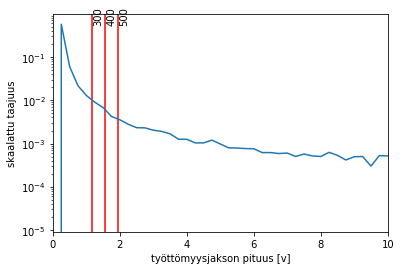

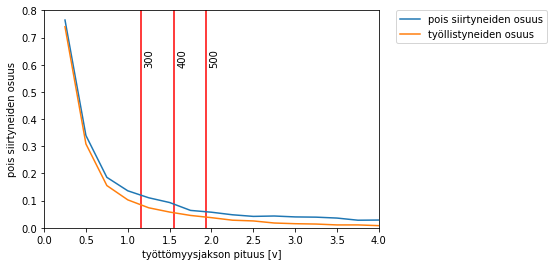

Jakauma laaja (ansiosidonnainen+tmtuki+putki+ulkopuoliset)


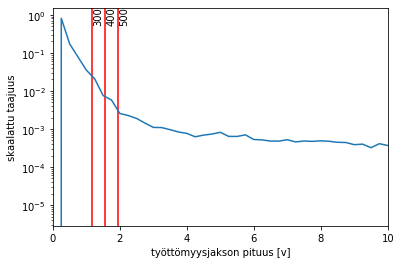

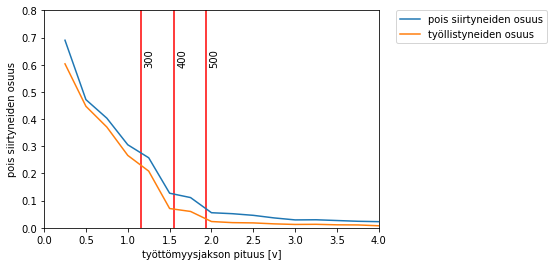

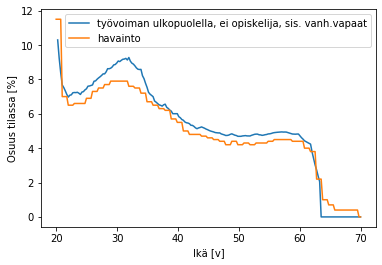

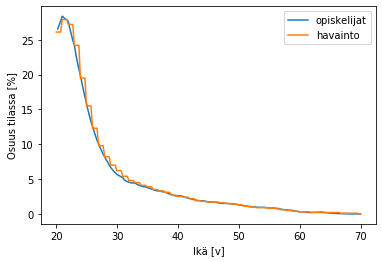

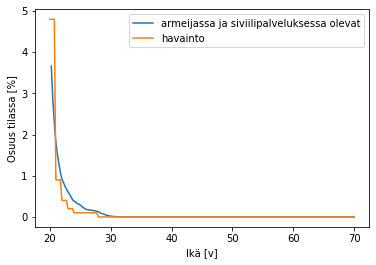

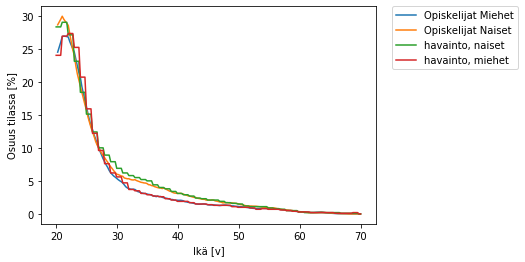

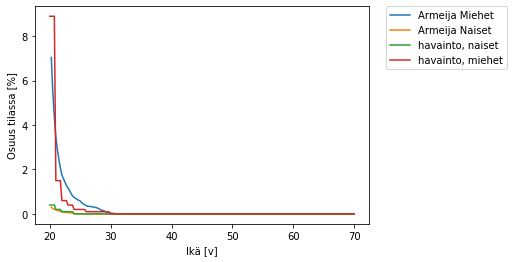

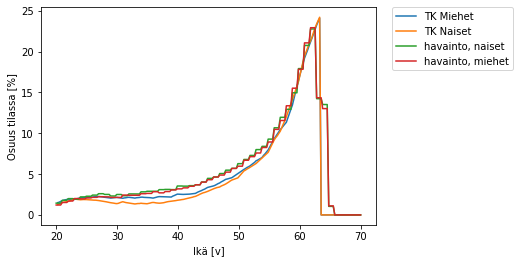

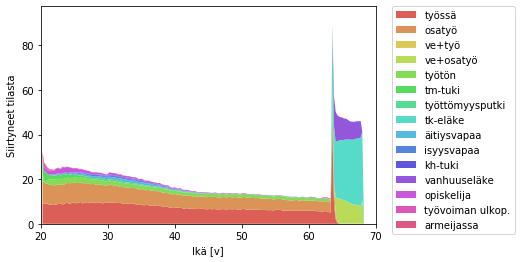

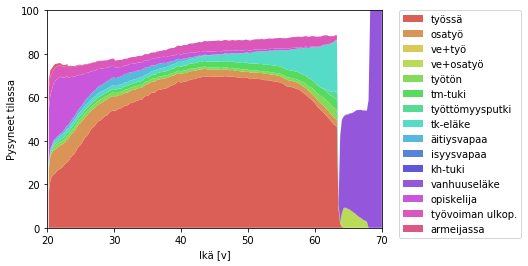

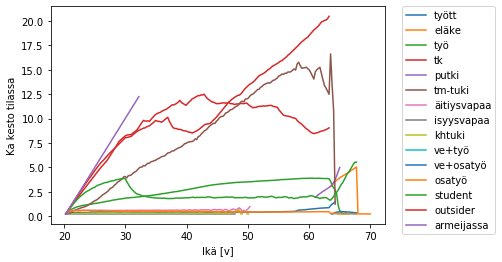

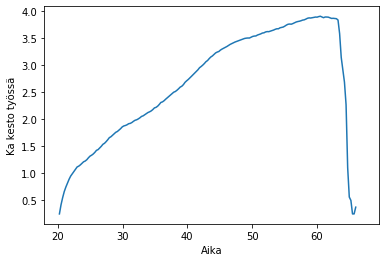

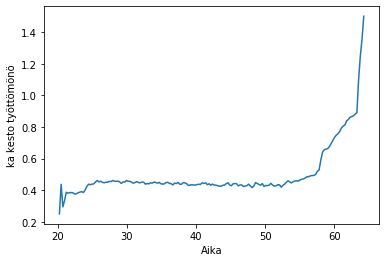

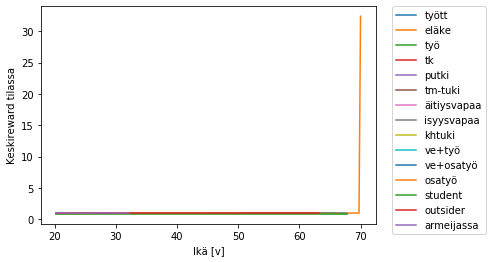

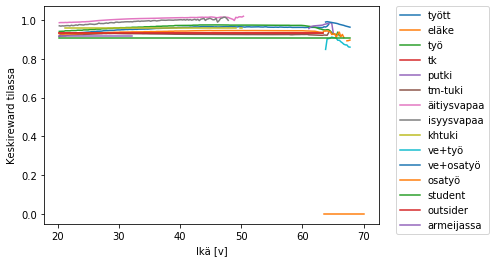

No handles with labels found to put in legend.


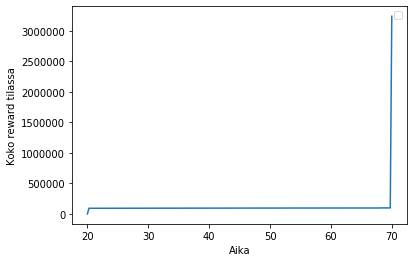

yhteensä reward 224.026532166218


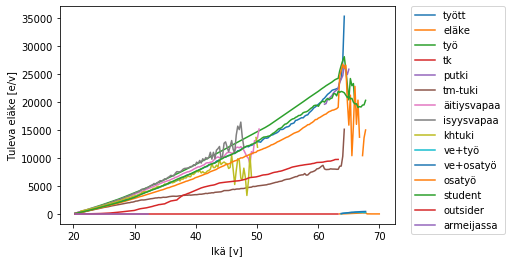

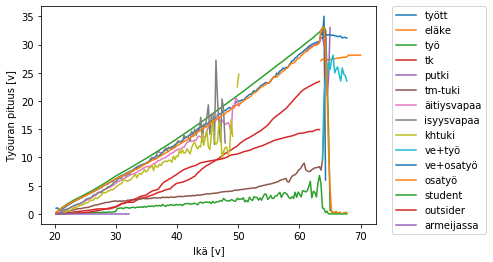

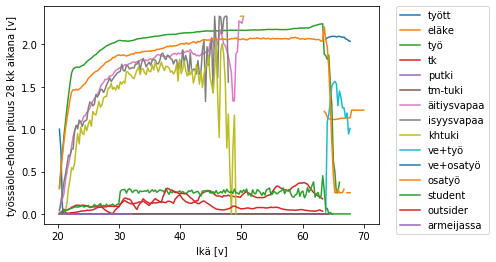

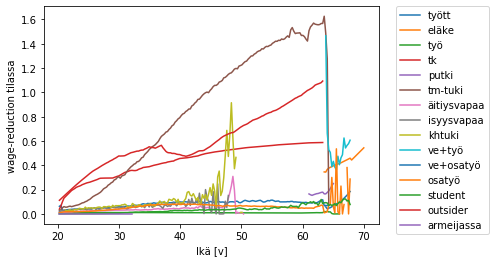

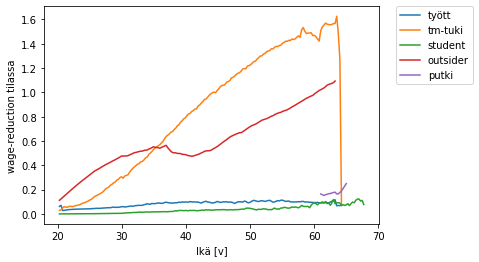

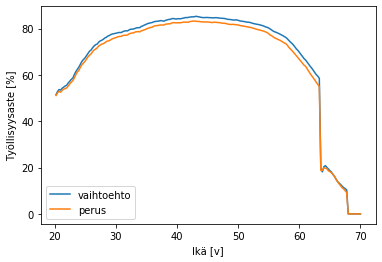

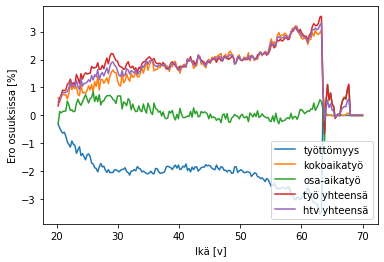

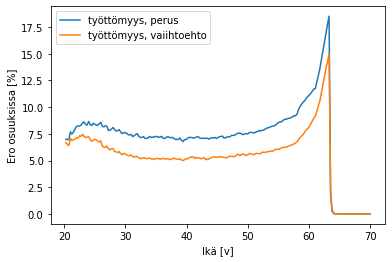

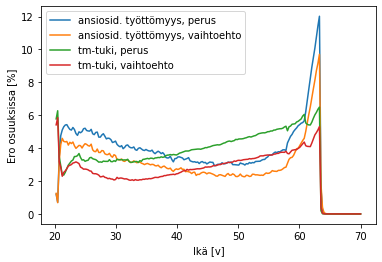

Työllisyysvaikutus 21-63-vuotiaisiin noin 57509 htv ja 59759 työllistö
Työllisyysastevaikutus 21-63-vuotiailla noin 2.03 prosenttia (77.51 vs 75.48)
epävarmuus työllisyysasteissa 0.0062, hajonta 0.0818


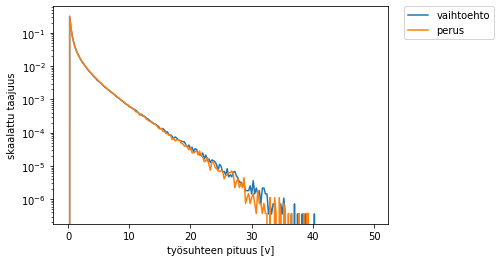

Jakauma ansiosidonnainen+tmtuki+putki, no max age


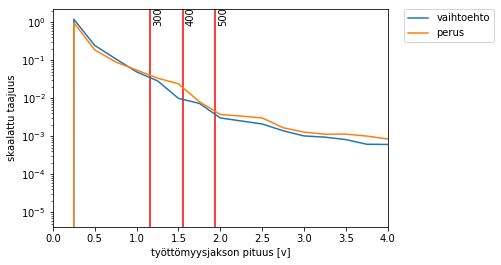

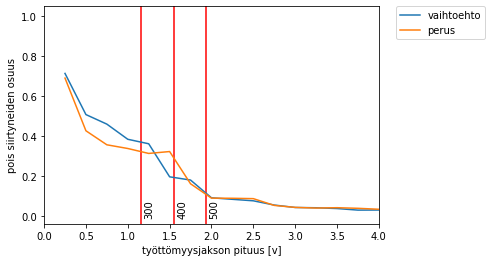

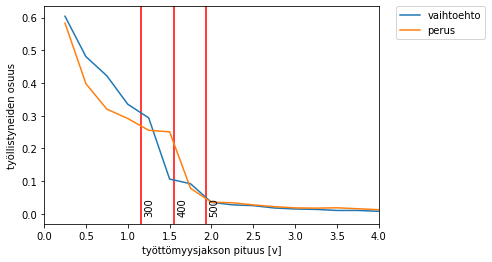

In [9]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_ek',plot=True,
                results='results/ek_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
#cc2.render(load='results/ek_results')
#cc2.load_sim(load='results/ek_results')
cc2.compare_with(cc1)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



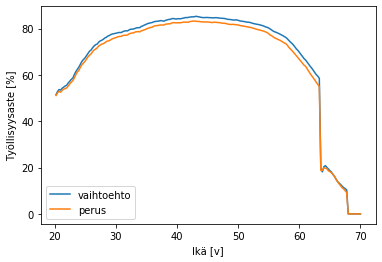

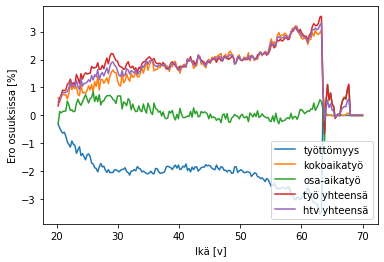

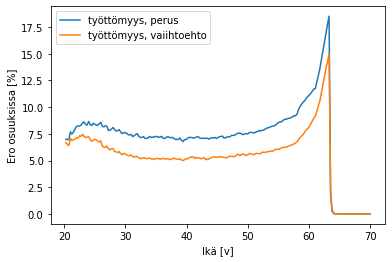

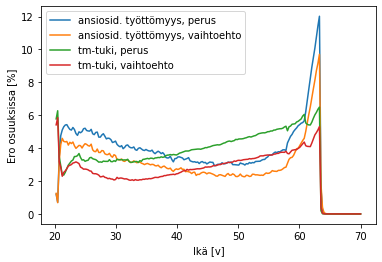

Työllisyysvaikutus 21-63-vuotiaisiin noin 57509 htv ja 59759 työllistö
Työllisyysastevaikutus 21-63-vuotiailla noin 2.03 prosenttia (77.51 vs 75.48)
epävarmuus työllisyysasteissa 0.0062, hajonta 0.0818


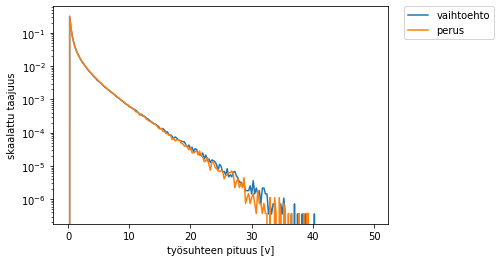

Jakauma ansiosidonnainen+tmtuki+putki, no max age


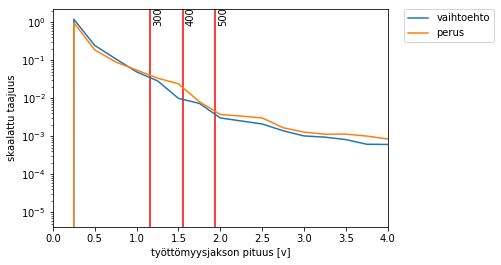

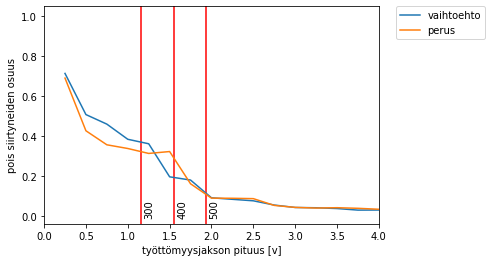

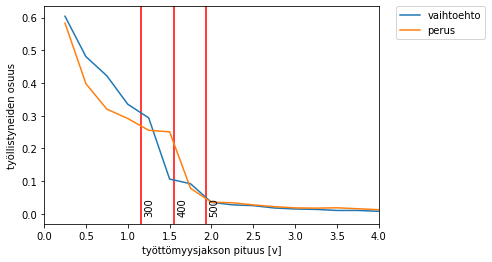

In [10]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.load_sim(load='results/ek_results')
cc2.compare_with(cc1)

## Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

In [11]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_toe.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/best_12kk',plot=True,
                    results='results/12kk_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_toe.render(load='results/12kk_results')


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3239     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.013   |
| total_timesteps    | 0        |
| value_loss         | 0.00949  |
---------------------------------
---------------------------------
| explained_variance | 0.834    |
| fps                | 3525     |
| nupdates           | 10       |
| policy_entropy     | 1.03     |
| policy_loss        | 0.333    |
| total_timesteps    | 196353   |
| value_loss         |

KeyboardInterrupt: 

In [ ]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc1_toe.load_sim(load='results/12kk_results')
cc1_toe.compare_with(cc1)

## Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,
                  mortality=mortality,perustulo=False,randomness=randomness)
cc1_350.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_50pv',plot=True,
                    results='results/50pv_results',start_from=perusmalli,cont=True,
                    callback_minsteps=callback_minsteps,twostage=twostage)



In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc1_350.load_sim(load='results/50pv_results')
cc1_350.compare_with(cc1)

## Perustulo

Alustava versio perustulosta, joka ei mallinna koko perustuloa vielä. Tulee muuttumaan, kun mukana koko mallli.

In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_pt',plot=True,
                   results='results/perustulo_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_pt.render(load='results/perustulo_results')


In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc1_pt.load_sim(load='results/perustulo_results')
cc1_pt.compare_with(cc1)

## 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_400.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_300pv',plot=True,
                    results='results/300pv_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_400.render(load='results/300pv_results')


In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc1_400.load_sim(load='results/300pv_results')
cc1_400.compare_with(cc1)

# Deep Q-network

Kokeillaan toista menetelmää ratkaisuun. Muutos on helppo tehdä, muutetaan vain algoritmin valintaa säätelevän parametrin _rlmodel_ arvo, ja varmistetaan että kaikki lähtee alusta liikkeelle (_cont=False_). Deep Q-network on menetelmänä hitaampi kuin ACKTR, joten tässä aika-askelten määrä on rajattu 1 000 000:aan.

In [ ]:
#cc1q=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc1q.explain()
#cc1q.run_results(debug=False,steps1=1_000_000,steps2=size2,pop=1_000,deterministic=deterministic,
#                train=True,predict=True,batch1=1,batch2=batch2,
#                save=perusmalli+'_dqn',plot=True,cont=False,start_from=perusmalli+'_dqn',results='results/perus_results3_dqn',
#                callback_minsteps=callback_minsteps,rlmodel='dqn',twostage=False)